## Models

Test out the following models:
K-Mode Clustering
XGBoost
Random Forest
Isomapping

GLM not necessary potentially?

In [41]:
# Necessary imports
#The foundation
#The models will be imported as needed
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns

In [2]:
# Calling out the stored variable for our models from the Pre-Processing Notebook
from sklearn import datasets
%store -r df

In [3]:
df.head()

,ram_gb,ssd_gb,hdd_gb,graphic_card_gb,display_size,latest_price,os_bit_64,brand_APPLE,brand_ASUS,brand_Avita,...,ram_type_DDR5,ram_type_LPDDR3,ram_type_LPDDR4,ram_type_LPDDR4X,os_Mac,os_Windows,weight_Gaming,weight_ThinNlight,msoffice_Yes,Binarize_Warranty
0,4,0,1024,0,15.6,324.87,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,4,0,512,0,15.6,254.67,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4,128,0,0,15.6,259.87,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,4,128,0,0,15.6,279.37,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,4,256,0,0,15.6,324.87,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [152]:
df.columns

Index(['ram_gb', 'ssd_gb', 'hdd_gb', 'graphic_card_gb', 'display_size',
       'latest_price', 'os_bit_64', 'brand_APPLE', 'brand_ASUS', 'brand_Avita',
       'brand_DELL', 'brand_HP', 'brand_Infinix', 'brand_LG', 'brand_Lenovo',
       'brand_MICROSOFT', 'brand_MSI', 'brand_Mi', 'brand_Nokia',
       'brand_RedmiBook', 'brand_SAMSUNG', 'brand_Smartron', 'brand_Vaio',
       'brand_acer', 'brand_iball', 'brand_lenovo', 'brand_realme',
       'processor_brand_Intel', 'processor_brand_M1',
       'processor_brand_MediaTek', 'processor_brand_Qualcomm',
       'processor_name_APU Dual', 'processor_name_Athlon Dual',
       'processor_name_Celeron Dual', 'processor_name_Core',
       'processor_name_Core i3', 'processor_name_Core i5',
       'processor_name_Core i7', 'processor_name_Core i9',
       'processor_name_Core m3', 'processor_name_Dual Core',
       'processor_name_Ever Screenpad', 'processor_name_GEFORCE RTX',
       'processor_name_GeForce GTX', 'processor_name_GeForce RTX',
   

In [3]:
#Create the dataset -> We are working with clustering so no need to create a train/test set
#X = df.drop('latest_price', axis = 1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)

X = df
X.shape

#for labels
#y = df[['latest_price']]


(896, 75)

In [219]:
#Scale our X accordingly using MinMaxScaler
X_to_scale = ['ram_gb', 'ssd_gb', 'hdd_gb', 'graphic_card_gb', 'display_size', 'latest_price']

#Initialize the MinMax Scaler
X_scaled = MinMaxScaler()

#Fit the X data for our numerical columns
X_scaled.fit(X[X_to_scale])

#Transform the X data for both the X_train and X_test
X_scaled = X_scaled.transform(X[X_to_scale])

#Convert these back to dataframes so we can add them back in
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns = X_to_scale)
#X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_to_scale)

In [220]:
#Add back in the columns
#All the other columns
X_other_columns = X.columns.drop(X_to_scale)

#Join from scaled to not-scaled
X = X_scaled.join(X[X_other_columns])

#Make sure we have no crazy join issues, we should have shape [896, 75] 
print(X.shape)

(896, 75)


In [155]:
#Start with K-Mode Clustering from: https://github.com/nicodv/kmodes
#Install using conda install -c conda-forge kmodes (on anaconda)
from kmodes import kmodes, kprototypes

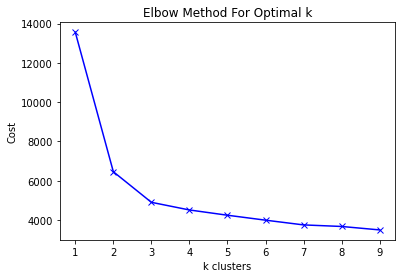

In [158]:
#We will initialize our model - documentation here: https://github.com/nicodv/kmodes/blob/master/kmodes/kprototypes.py
#We need to first see how many clusters would be ideal for our algorithm
#Also define the initialization method utilizing Cao's algorithm

cost =[]
K = range(1,10)
#categorical indices
categorical = list(range(5,74))
for num in list(K):
    kmodes = kprototypes.KPrototypes(n_clusters = num, init = 'Cao', n_init = 5);
    kmodes.fit_predict(X, categorical = categorical);
    cost.append(kmodes.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [159]:
#It seems that 3 clusters is the ideal grouping for our data
kmodes = kprototypes.KPrototypes(n_clusters = 3, init = 'Cao', n_init = 5);
clusters = kmodes.fit_predict(X, categorical = categorical);

In [212]:
#plt.hist(kmodes.labels_);

In [187]:
X['clusters'] = clusters

In [162]:
#Utilize PCA to plot our clusters out here
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_df = pd.DataFrame(pca.fit_transform(X.drop(['clusters'], axis = 1)))
pca_df.columns = ['PCA_comp1','PCA_comp2']


In [163]:
#We want to look at the variables with the highest variance contribution so we look at the pca components
#Lets look at the top components that are impacting our 2 variables here for some interpretability

pca_comp = pd.DataFrame(pca.components_, columns = X.drop(['clusters'],axis = 1).columns)

In [164]:
pca_comp_T = pca_comp.T
pca_comp_T.columns = ['Component1', 'Component2']
pca_comp_T

,Component1,Component2
ram_gb,0.012750,-0.008434
ssd_gb,-0.022784,0.041237
hdd_gb,0.048248,-0.035731
graphic_card_gb,0.102309,0.079050
display_size,0.019060,0.022866
...,...,...
os_Windows,-0.140683,-0.033676
weight_Gaming,0.013828,0.020789
weight_ThinNlight,-0.251139,-0.287679
msoffice_Yes,-0.516506,-0.163843


In [165]:
pca_comp_T[['Component1']].sort_values('Component1', ascending = False).head(10)

,Component1
brand_ASUS,0.160480
processor_brand_Intel,0.157712
ram_type_LPDDR4,0.111298
graphic_card_gb,0.102309
processor_name_Core i5,0.072069
processor_name_Core i7,0.069922
brand_MSI,0.065424
hdd_gb,0.048248
latest_price,0.041147
processor_name_Celeron Dual,0.039118


In [166]:
pca_comp_T[['Component2']].sort_values('Component2', ascending = False).head(10)

,Component2
processor_gnrtn_11th,0.262597
brand_ASUS,0.231696
processor_name_Ryzen 5,0.205508
processor_name_Ryzen 7,0.162127
processor_name_Ryzen 9,0.084169
graphic_card_gb,0.079050
processor_name_M1,0.053490
processor_brand_M1,0.053490
os_Mac,0.047983
brand_APPLE,0.047983


In [167]:
#joining columns of PCA to the data so we can plot the clusters
plotX = pd.concat([X,pca_df], axis=1, join='inner')

In [168]:
#Create cluster data
cluster0 = plotX[plotX['clusters'] == 0]
cluster1 = plotX[plotX['clusters'] == 1]
cluster2 = plotX[plotX['clusters'] == 2]
cluster3 = plotX[plotX['clusters'] == 3]
cluster4 = plotX[plotX['clusters'] == 4]
cluster5 = plotX[plotX['clusters'] == 5]
cluster6 = plotX[plotX['clusters'] == 6]
cluster7 = plotX[plotX['clusters'] == 7]
cluster8 = plotX[plotX['clusters'] == 8]
cluster9 = plotX[plotX['clusters'] == 9]
cluster10 = plotX[plotX['clusters'] == 10]

In [169]:
#Utilize plotly for complicated plots 
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [170]:
init_notebook_mode(connected=True)

In [171]:
trace0 = go.Scatter(
                    x = cluster0["PCA_comp1"],
                    y = cluster0["PCA_comp2"],
                    mode = 'markers', marker = dict(size = 4),
                    name = 'Cluster 0')

trace1 = go.Scatter(
                    x = cluster1["PCA_comp1"],
                    y = cluster1["PCA_comp2"],
                    mode = 'markers', marker = dict(size = 4),
                    name = 'Cluster 1')

trace2 = go.Scatter(
                    x = cluster2["PCA_comp1"],
                    y = cluster2["PCA_comp2"],
                    mode = 'markers', marker = dict(size = 4),
                    name = 'Cluster 2')

trace3 = go.Scatter(
                    x = cluster3["PCA_comp1"],
                    y = cluster3["PCA_comp2"],
                    mode = 'markers', marker = dict(size = 4),
                    name = 'Cluster 3')

trace4 = go.Scatter(
                    x = cluster4["PCA_comp1"],
                    y = cluster4["PCA_comp2"],
                    mode = 'markers', marker = dict(size = 4),
                    name = 'Cluster 4')

trace5 = go.Scatter(
                    x = cluster5["PCA_comp1"],
                    y = cluster5["PCA_comp2"],
                    mode = 'markers', marker = dict(size = 4),
                    name = 'Cluster 5')

trace6 = go.Scatter(
                    x = cluster6["PCA_comp1"],
                    y = cluster6["PCA_comp2"],
                    mode = 'markers', marker = dict(size = 4),
                    name = 'Cluster 6')

trace7 = go.Scatter(
                    x = cluster7["PCA_comp1"],
                    y = cluster7["PCA_comp2"],
                    mode = 'markers', marker = dict(size = 4),
                    name = 'Cluster 7')

trace8 = go.Scatter(
                    x = cluster8["PCA_comp1"],
                    y = cluster8["PCA_comp2"],
                    mode = 'markers', marker = dict(size = 4),
                    name = 'Cluster 8')

trace9 = go.Scatter(
                    x = cluster9["PCA_comp1"],
                    y = cluster9["PCA_comp2"],
                    mode = 'markers', marker = dict(size = 4),
                    name = 'Cluster 9')

trace10 = go.Scatter(
                    x = cluster10["PCA_comp1"],
                    y = cluster10["PCA_comp2"],
                    mode = 'markers', marker = dict(size = 4),
                    name = 'Cluster 10')

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]

title = "Visualizing Cluster in 2-D"

layout = dict(title = title,
              xaxis = dict(title = 'PC1', ticklen = 5, zeroline = False),
              yaxis = dict(title = 'PC2', ticklen = 5, zeroline = False)
                          )
              
fig = dict(data = data, layout = layout)
              
iplot(fig)

In [172]:
#Lets try 3D
pca3 = PCA(n_components = 3)
pca_3df = pd.DataFrame(pca3.fit_transform(X.drop(['Clusters'], axis = 1)))
pca_3df.columns = ['PCA_comp1','PCA_comp2','PCA_comp3']


In [173]:
#We want to look at the variables with the highest variance contribution so we look at the pca components
#Lets look at the top components that are impacting our 2 variables here for some interpretability

pca_3comp = pd.DataFrame(pca3.components_, columns = X.drop(['Clusters'],axis = 1).columns)
pca_3comp_T = pca_3comp.T
pca_3comp_T.columns = ['Component1', 'Component2','Component3']
pca_3comp_T

,Component1,Component2,Component3
ram_gb,0.012750,-0.008434,-0.075847
ssd_gb,-0.022784,0.041237,-0.065852
hdd_gb,0.048248,-0.035731,0.060869
graphic_card_gb,0.102309,0.079050,-0.145033
display_size,0.019060,0.022866,-0.039422
...,...,...,...
os_Windows,-0.140683,-0.033676,-0.004883
weight_Gaming,0.013828,0.020789,-0.065738
weight_ThinNlight,-0.251139,-0.287680,0.426670
msoffice_Yes,-0.516506,-0.163843,-0.205938


In [174]:
pca_3comp_T[['Component1']].sort_values('Component1', ascending = False).head(5)

,Component1
brand_ASUS,0.160479
processor_brand_Intel,0.157711
ram_type_LPDDR4,0.111298
graphic_card_gb,0.102309
processor_name_Core i5,0.072069


In [175]:
pca_3comp_T[['Component2']].sort_values('Component2', ascending = False).head(5)

,Component2
processor_gnrtn_11th,0.262596
brand_ASUS,0.231696
processor_name_Ryzen 5,0.205508
processor_name_Ryzen 7,0.162128
processor_name_Ryzen 9,0.084169


In [176]:
pca_3comp_T[['Component3']].sort_values('Component3', ascending = False).head(5)

,Component3
weight_ThinNlight,0.426670
processor_name_Core i3,0.424937
brand_DELL,0.209691
ram_type_DDR4,0.189636
hdd_gb,0.060869


In [177]:
plot3X = pd.concat([X,pca_3df], axis=1, join='inner')

In [180]:
cluster0 = plot3X[plot3X['clusters'] == 0]
cluster1 = plot3X[plot3X['clusters'] == 1]
cluster2 = plot3X[plot3X['clusters'] == 2]
cluster3 = plot3X[plot3X['clusters'] == 3]
cluster4 = plot3X[plot3X['clusters'] == 4]
cluster5 = plot3X[plot3X['clusters'] == 5]
cluster6 = plot3X[plot3X['clusters'] == 6]
cluster7 = plot3X[plot3X['clusters'] == 7]
cluster8 = plot3X[plot3X['clusters'] == 8]
cluster9 = plot3X[plot3X['clusters'] == 9]
cluster10 = plot3X[plot3X['clusters'] == 10]

In [181]:
cluster0.head()

,ram_gb,ssd_gb,hdd_gb,graphic_card_gb,display_size,latest_price,os_bit_64,brand_APPLE,brand_ASUS,brand_Avita,...,os_Mac,os_Windows,weight_Gaming,weight_ThinNlight,msoffice_Yes,Binarize_Warranty,Clusters,PCA_comp1,PCA_comp2,PCA_comp3
0,0.0,0.000000,0.50,0.0,0.666667,0.025701,1,0,0,0,...,0,1,0,1,0,0,0,0.293963,0.104059,0.940681
1,0.0,0.000000,0.25,0.0,0.666667,0.013084,1,0,0,0,...,0,1,0,0,0,0,0,0.540156,0.407141,0.520497
2,0.0,0.041667,0.00,0.0,0.666667,0.014019,1,0,0,1,...,0,1,0,1,0,0,0,0.344625,0.225130,0.965326
3,0.0,0.041667,0.00,0.0,0.666667,0.017523,1,0,0,1,...,0,1,0,1,0,0,0,0.344769,0.225224,0.965102
4,0.0,0.083333,0.00,0.0,0.666667,0.025701,1,0,0,1,...,0,1,0,1,0,0,0,0.344156,0.227161,0.961834


In [182]:
trace0 = go.Scatter3d(
                    x = cluster0["PCA_comp1"],
                    y = cluster0["PCA_comp2"],
                    z = cluster0["PCA_comp3"],
                    mode = 'markers',
                    marker = dict(size = 3),
                    name = 'Cluster 0')

trace1 = go.Scatter3d(
                    x = cluster1["PCA_comp1"],
                    y = cluster1["PCA_comp2"],
                    z = cluster1["PCA_comp3"],
                    mode = 'markers', marker = dict(size = 3),
                    name = 'Cluster 1')

trace2 = go.Scatter3d(
                    x = cluster2["PCA_comp1"],
                    y = cluster2["PCA_comp2"],
                    z = cluster2["PCA_comp3"],
                    mode = 'markers', marker = dict(size = 3),
                    name = 'Cluster 2')

trace3 = go.Scatter3d(
                    x = cluster3["PCA_comp1"],
                    y = cluster3["PCA_comp2"],
                    z = cluster3["PCA_comp3"],
                    mode = 'markers', marker = dict(size = 3),
                    name = 'Cluster 3')

trace4 = go.Scatter3d(
                    x = cluster4["PCA_comp1"],
                    y = cluster4["PCA_comp2"],
                    z = cluster4["PCA_comp3"],
                    mode = 'markers', marker = dict(size = 3),
                    name = 'Cluster 4')

trace5 = go.Scatter3d(
                    x = cluster5["PCA_comp1"],
                    y = cluster5["PCA_comp2"],
                    z = cluster5["PCA_comp3"],
                    mode = 'markers', marker = dict(size = 3),
                    name = 'Cluster 5')

trace6 = go.Scatter3d(
                    x = cluster6["PCA_comp1"],
                    y = cluster6["PCA_comp2"],
                    z = cluster6["PCA_comp3"],
                    mode = 'markers', marker = dict(size = 3),
                    name = 'Cluster 6')

trace7 = go.Scatter3d(
                    x = cluster7["PCA_comp1"],
                    y = cluster7["PCA_comp2"],
                    z = cluster7["PCA_comp3"],
                    mode = 'markers', marker = dict(size = 3),
                    name = 'Cluster 7')

trace8 = go.Scatter3d(
                    x = cluster8["PCA_comp1"],
                    y = cluster8["PCA_comp2"],
                    z = cluster8["PCA_comp3"],
                    mode = 'markers', marker = dict(size = 3),
                    name = 'Cluster 8')

trace9 = go.Scatter3d(
                    x = cluster9["PCA_comp1"],
                    y = cluster9["PCA_comp2"],
                    z = cluster9["PCA_comp3"],
                    mode = 'markers', marker = dict(size = 3),
                    name = 'Cluster 9')

trace10 = go.Scatter3d(
                    x = cluster10["PCA_comp1"],
                    y = cluster10["PCA_comp2"],
                    z = cluster10["PCA_comp3"],
                    mode = 'markers', marker = dict(size = 3),
                    name = 'Cluster 10')

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]

title = "Visualizing Cluster in 3-D"

layout = dict(title = title,
              xaxis = dict(title = 'PC1', ticklen = 5, zeroline = False),
              yaxis = dict(title = 'PC2', ticklen = 5, zeroline = False)
                          )
              
fig = dict(data = data, layout = layout)

              
iplot(fig)

In [211]:
#fig = go.Figure(data=
#    go.Parcoords(
#        line = dict(color = X['clusters']),
#        dimensions = list([
#            dict(label = 'RAM Size', values = X['ram_gb']),
#            dict(label = 'Display Size', values = X['display_size']),
#            dict(label = 'SSD size', values = X['ssd_gb']),
#            dict(label = 'HDD size', values = X['hdd_gb']),
#            
#            dict(label = 'Latest Price', values = X['latest_price'])
#        ])
#)        
#)

#fig.update_layout(
#    plot_bgcolor = 'white',
#    paper_bgcolor = 'white')
                
#fig.show()

## K Modes Thoughts

Although we were able to use K-Modes the inability to visualize or really understand the outputs of the clustering method makes it difficult to act upon. We're going to move on and try a different model.

WE DID THE THING
Analyze after

## Isomapping

In [213]:
# Might be useful to have categories like for Decision Tree
cuts = [150, 550, 950, 1350, 1750, 2150, 2550, 2950, 3350, 3750, 4150, 6000]
labels = ["$150-$550", "$550-$950", "$950-$1350","$1350-1750","$1750-$2150", "$2150-$2550",\
          "$2550-$2950", "$2950-$3350", "$3350-$3750", "$3750-$4150", "$4150 and up"]

df['price_cat'] = pd.cut(df['latest_price'], cuts, labels = labels)

In [224]:
#Create the dataset -> We are working with dimension reduction so no strict test/train set 
#Instead, we are looking at a way to explain our data.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)

#for labels
X = df.drop(['price_cat'], axis = 1)

#Scale our X accordingly using MinMaxScaler
X_to_scale = ['ram_gb', 'ssd_gb', 'hdd_gb', 'graphic_card_gb', 'display_size', 'latest_price']

#Initialize the MinMax Scaler
X_scaled = MinMaxScaler()

#Fit the X data for our numerical columns
X_scaled.fit(X[X_to_scale])

#Transform the X data for both the X_train and X_test
X_scaled = X_scaled.transform(X[X_to_scale])

#Convert these back to dataframes so we can add them back in
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns = X_to_scale)
#X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_to_scale)

#Add back in the columns
#All the other columns
X_other_columns = X.columns.drop(X_to_scale)

#Join from scaled to not-scaled
X = X_scaled.join(X[X_other_columns])

#y = df[['latest_price']]

In [282]:
y = df[['price_cat']]

,price_cat
0,$150-$550
1,$150-$550
2,$150-$550
3,$150-$550
4,$150-$550
...,...
891,$1750-$2150
892,$1750-$2150
893,$1750-$2150
894,$150-$550


In [226]:
from sklearn.manifold import Isomap


model = Isomap(n_neighbors = 6, n_components = 2)
model.fit(X)
manifold_2Da = model.transform(X)
manifold_2D = pd.DataFrame(manifold_2Da, columns = ['Component 1', 'Component 2'])

manifold_2D.head()

,Component 1,Component 2
0,1.960749,-0.783440
1,3.093276,-0.726104
2,2.319398,-1.513761
3,2.319355,-1.513798
4,2.318126,-1.515898


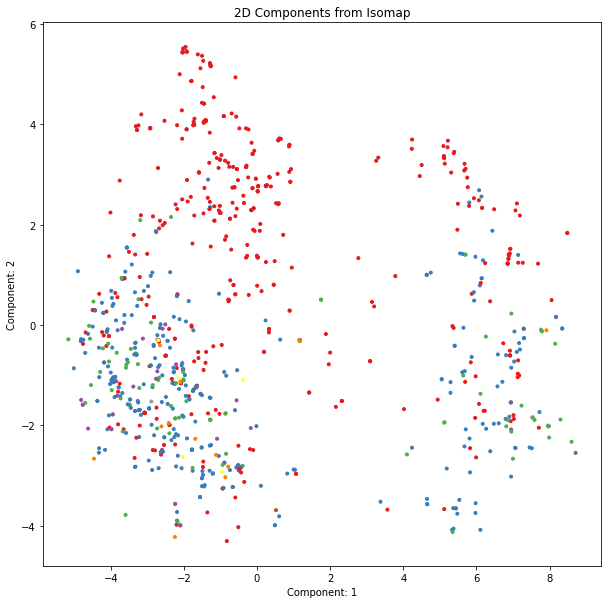

In [270]:
%matplotlib inline
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')
plt.scatter(x = manifold_2D['Component 1'], y = manifold_2D['Component 2'], marker='.', c = X['latest_price'], cmap = 'Set1')
plt.show();


In [256]:
model = Isomap(n_neighbors = 6, n_components = 3)
model.fit(X)
manifold_3Da = model.transform(X)
manifold_3D = pd.DataFrame(manifold_3Da, columns = ['Component 1', 'Component 2', 'Component 3'])

manifold_3D.head()

,Component 1,Component 2,Component 3
0,1.960749,-0.783440,-0.858777
1,3.093276,-0.726104,0.645194
2,2.319398,-1.513761,-0.082338
3,2.319355,-1.513798,-0.082345
4,2.318126,-1.515898,-0.082059


<IPython.core.display.Javascript object>


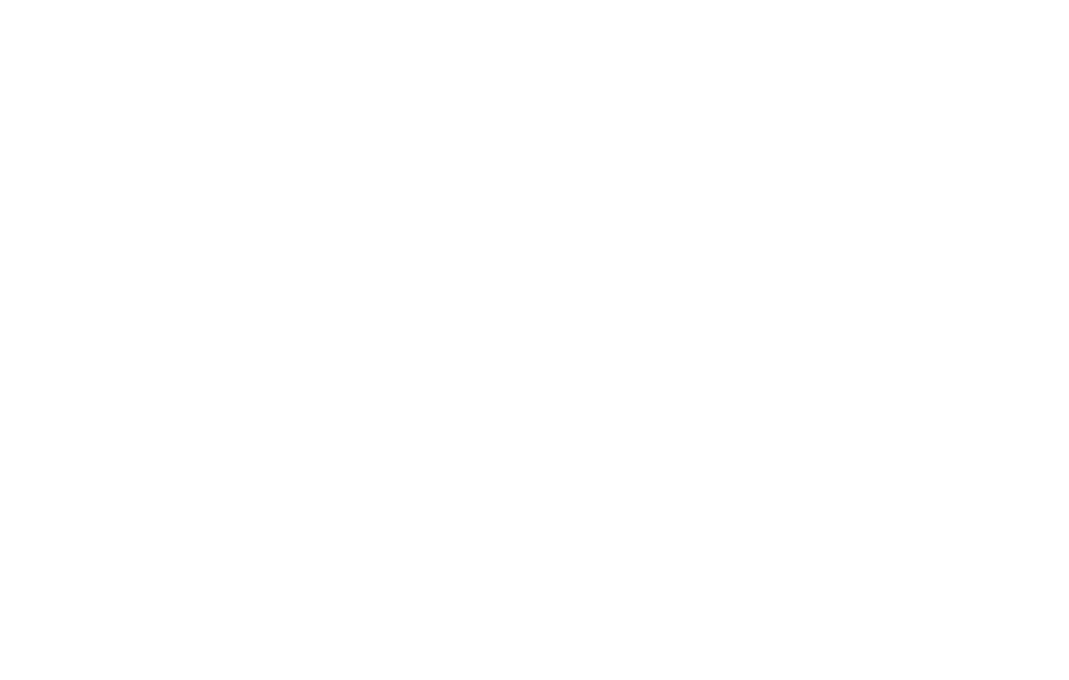

In [271]:
%matplotlib notebook

ax = plt.axes(projection = '3d')

zdata = manifold_3D['Component 1']
xdata = manifold_3D['Component 2']
ydata = manifold_3D['Component 3']
ax.scatter3D(xdata, ydata, zdata, c = X['latest_price'], cmap = 'Set1')

## XGboost and Random Forest Time

In [108]:
#We're going to make "categories" of prices because XGBoost likes to have labels
#We will build these categories based on priced ranges, lets first look at the range of prices we have

df['latest_price'].describe()

#With a maximum price of $5745 and a minimum price of $181.87 we want to avoid too many groups
#We will first try with  groups of 400, with the last group somewhat larger



count     896.000000
mean      992.028186
std       605.973607
min       181.870000
25%       591.370000
50%       825.422000
75%      1158.170000
max      5745.870000
Name: latest_price, dtype: float64

In [109]:
df['latest_price'].sort_values(ascending = False).head()

636    5745.87
649    4490.07
677    4029.87
632    3899.87
473    3785.47
Name: latest_price, dtype: float64

In [114]:
#creating our categories
cuts = [150, 550, 950, 1350, 1750, 2150, 2550, 2950, 3350, 3750, 4150, 6000]
labels = ["$150-$550", "$550-$950", "$950-$1350","$1350-1750","$1750-$2150", "$2150-$2550",\
          "$2550-$2950", "$2950-$3350", "$3350-$3750", "$3750-$4150", "$4150 and up"]

df['price_cat'] = pd.cut(df['latest_price'], cuts, labels = labels)


,price_cat,latest_price
0,$150-$550,324.87
1,$150-$550,254.67
2,$150-$550,259.87
3,$150-$550,279.37
4,$150-$550,324.87
...,...,...
891,$1750-$2150,1884.87
892,$1750-$2150,1949.87
893,$1750-$2150,1858.87
894,$150-$550,506.87


In [425]:
#Now that we have categories we can begin the XGBoost training
import xgboost as xgb

X = df.drop(['price_cat','latest_price'], axis = 1)
y = df[['price_cat']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

xgbr = xgb.XGBClassifier()

xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)

C:\Users\lutim\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\lutim\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[22:27:10] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [430]:
metrics.accuracy_score(y_test, y_pred)

0.6505576208178439

In [433]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 5,  0,  8,  1,  0,  1,  0,  0,  0,  1, 13],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  8,  1],
       [ 3,  0,  1,  0,  1,  0,  1,  0,  0,  2,  1],
       [ 0,  0,  3,  0,  2,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  1,  2,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  8,  0,  0,  0,  0,  0,  1,  0, 87, 13],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0, 12, 35]], dtype=int64)

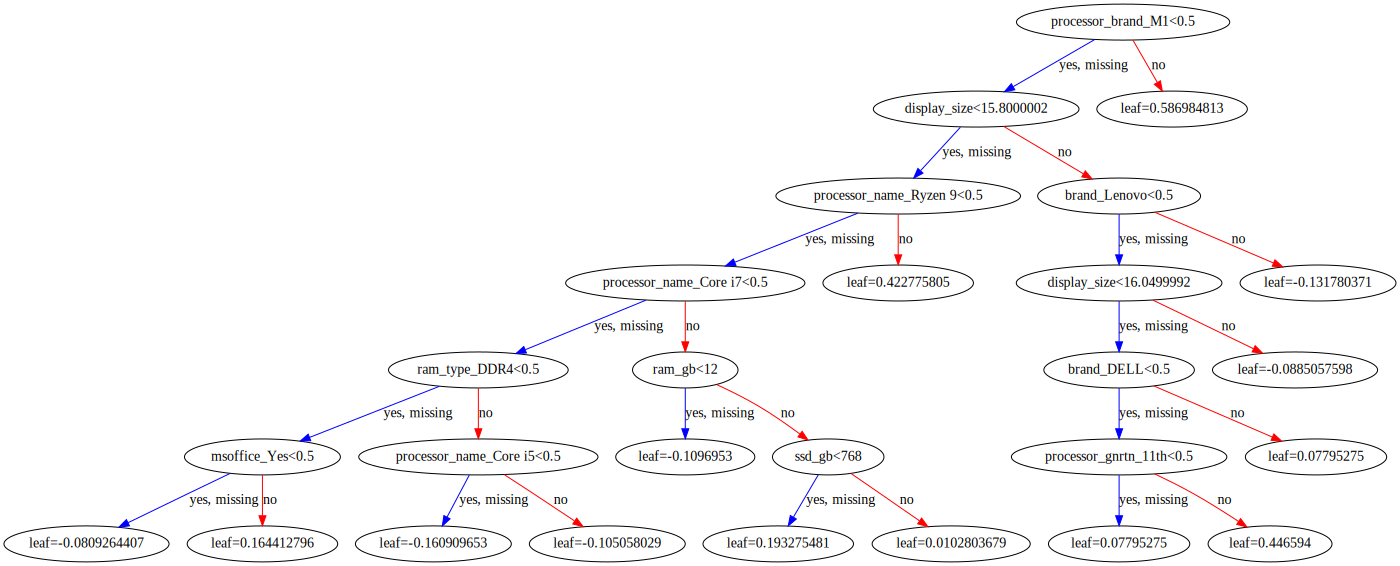

In [427]:
xgb.to_graphviz(xgbr)

In [434]:
y_pred

array(['$1750-$2150', '$1750-$2150', '$150-$550', '$150-$550',
       '$2550-$2950', '$550-$950', '$2150-$2550', '$2550-$2950',
       '$550-$950', '$150-$550', '$1350-1750', '$550-$950', '$950-$1350',
       '$550-$950', '$550-$950', '$550-$950', '$550-$950', '$550-$950',
       '$550-$950', '$550-$950', '$550-$950', '$950-$1350', '$550-$950',
       '$950-$1350', '$950-$1350', '$150-$550', '$950-$1350', '$150-$550',
       '$150-$550', '$550-$950', '$150-$550', '$950-$1350', '$550-$950',
       '$1750-$2150', '$950-$1350', '$550-$950', '$950-$1350',
       '$550-$950', '$550-$950', '$950-$1350', '$150-$550', '$950-$1350',
       '$150-$550', '$550-$950', '$550-$950', '$550-$950', '$950-$1350',
       '$550-$950', '$550-$950', '$150-$550', '$150-$550', '$150-$550',
       '$150-$550', '$550-$950', '$550-$950', '$1750-$2150', '$550-$950',
       '$150-$550', '$550-$950', '$550-$950', '$550-$950', '$2550-$2950',
       '$550-$950', '$550-$950', '$950-$1350', '$550-$950', '$1750-$2150',
